In [1]:
# imports
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Activation
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# ensure consistency across runs
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

# Imports to view data
import cv2 as cv
from glob import glob
from matplotlib import pyplot as plt
import numpy as np
from numpy import floor
import random

In [2]:
# data pre-processing
data_dir = "../asl_alphabet_train"
target_size = (64, 64)
target_dims = (64, 64, 3) # add channel for RGB
n_classes = 29
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")

label_map = train_generator.class_indices

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [3]:
# defining the model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(29, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [4]:
model.fit_generator(train_generator, epochs=7, validation_data=val_generator)

/home/rinald/.cache/pypoetry/virtualenvs/asl-translator-XVB9uddP-py3.8/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/home/rinald/.cache/pypoetry/virtualenvs/asl-translator-XVB9uddP-py3.8/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Epoch 1/7
1224/1224 [==============================] - 338s 260ms/step - loss: 1.2873 - accuracy: 0.6233 - val_loss: 1.5066 - val_accuracy: 0.7166
Epoch 2/7
1224/1224 [==============================] - 341s 278ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 1.6825 - val_accuracy: 0.7413
Epoch 3/7
1224/1224 [==============================] - 353s 289ms/step - loss: 0.0394 - accuracy: 0.9883 - val_loss: 1.4504 - val_accuracy: 0.7783
Epoch 4/7
1224/1224 [==============================] - 354s 289ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 1.4552 - val_accuracy: 0.7915
Epoch 5/7
1224/1224 [==============================] - 352s 287ms/step - loss: 0.0238 - accuracy: 0.9932 - val_loss: 1.4648 - val_accuracy: 0.7931
Epoch 6/7
1224/1224 [==============================] - 350s 286ms/step - loss: 0.0262 - accuracy: 0.9925 - val_loss: 1.8329 - val_accuracy: 0.7755
Epoch 7/7
1224/1224 [==============================] - 352s 288ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 2

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

In [23]:
cap = cv.VideoCapture(0)

while True:
    _, frame = cap.read()
    # cv.rectangle(frame,(0, 0), (200, 200), (255, 0, 0))

    hand = frame[0:200, 0:200]
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# plt.imshow(hand)

cap.release()
cv.destroyAllWindows()

(1, 64, 64, 3)

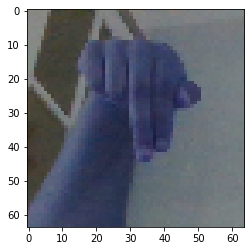

In [24]:
hand_small = cv.resize(hand, (64, 64))
plt.imshow(hand_small)
hand_small = np.expand_dims(hand_small, axis=0)
hand_small.shape

In [26]:
model(hand_small)

<tf.Tensor: shape=(1, 29), dtype=float32, numpy=
array([[9.4947860e-17, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        7.5241937e-15, 5.3573356e-30, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 6.6245026e-27, 2.1133927e-08,
        0.0000000e+00]], dtype=float32)>

In [27]:
from glob import glob
class_names = glob("../asl_alphabet_train/*") # Reads all the folders in which images are present
class_names = sorted(class_names) # Sorting them
name_id_map = dict(zip(class_names, range(len(class_names))))

In [ ]:
class_names

In [ ]:
name_id_map

In [ ]:
label_map

In [18]:
model.save('asl_model')

INFO:tensorflow:Assets written to: asl_model/assets
